In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn import tree

In [3]:
data = pd.read_csv("glass.csv")

In [4]:
# Shuffle the data
data = data.sample(frac=1).reset_index(drop=True)

In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
# Seperate the target column `Type`
target = data['Type']
data = data.drop('Type', axis=1)

In [7]:
# Normalizing the data as it's skewed. Skewness is evident from varing mean and range of each columns
data = data.apply(lambda x: (x-x.mean())/(x.max()-x.min()), axis=0)
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-3.548952e-15,1.337456e-15,-1.335899e-16,-1.871556e-16,-2.391130e-15,6.290399e-18,2.898934e-16,-3.488902e-17,2.619919e-17
std,1.333127e-01,1.227975e-01,3.212490e-01,1.555357e-01,1.383117e-01,1.050228e-01,1.322633e-01,1.578474e-01,1.910563e-01
min,-3.167437e-01,-4.026843e-01,-5.978915e-01,-3.597840e-01,-5.073097e-01,-8.004124e-02,-3.277846e-01,-5.557039e-02,-1.117830e-01
25%,-8.090081e-02,-7.524067e-02,-1.268447e-01,-7.941014e-02,-6.623832e-02,-6.031499e-02,-6.663221e-02,-5.557039e-02,-1.117830e-01
50%,-3.008870e-02,-1.621812e-02,1.771642e-01,-2.645064e-02,2.483311e-02,9.330745e-03,-3.317496e-02,-5.557039e-02,-1.117830e-01
75%,3.477083e-02,6.272925e-02,2.038903e-01,5.766151e-02,7.795811e-02,1.818743e-02,2.003136e-02,-5.557039e-02,8.429540e-02
max,6.832563e-01,5.973157e-01,4.021085e-01,6.402160e-01,4.926903e-01,9.199588e-01,6.722154e-01,9.444296e-01,8.882170e-01


RI    [Line2D(RI)]
Na    [Line2D(Na)]
Mg    [Line2D(Mg)]
Al    [Line2D(Al)]
Si    [Line2D(Si)]
K      [Line2D(K)]
Ca    [Line2D(Ca)]
Ba    [Line2D(Ba)]
Fe    [Line2D(Fe)]
dtype: object

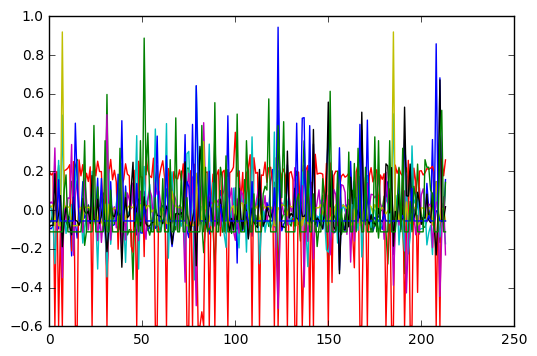

In [8]:
# Visualizing the normalized data
data.apply(lambda x: plt.plot(x), axis=0)

In [41]:
m_all = data.shape[0]  # Total number of data samples
m_train = int(0.80 * m_all)
m_cv = m_all - m_train

x_train = data.iloc[:m_train]
y_train = target.iloc[:m_train]
x_cv = data.iloc[m_train:]
y_cv = target.iloc[m_train:]

In [137]:
best_train_accuracy, best_cv_accuracy = 0, 0
for __ in xrange(500):
    # Training with decision tree
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(x_train, y_train)

    # Prediction on training and cross validation sets using decision tree
    train_prediction = clf.predict(x_train)
    cv_prediction = clf.predict(x_cv)

    # Finding accuracy
    num_correct_clf_train = sum(train_prediction == y_train)
    num_correct_clf_cv = sum(cv_prediction == y_cv)
    train_accuracy = num_correct_clf_train / float(m_train) * 100
    cv_accuracy = num_correct_clf_cv / float(m_cv) * 100
    
    if cv_accuracy > best_cv_accuracy:
        best_train_accuracy = train_accuracy
        best_cv_accuracy = cv_accuracy

print 'Training Accuracy:', best_train_accuracy, '%'
print 'Cross Validation Accuracy:', best_cv_accuracy, '%'

Training Accuracy: 100.0 %
Cross Validation Accuracy: 86.0465116279 %
